In this notebook, I show histograms of the data. An alternative would be to show these as CDFs. These results appear in Figure 2 of the paper. 

In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get the Data

In [2]:
all_xray_df, all_radio_df, Lr_med, Lx_med = get_all_data()

Found 26 data files.
1A 1744-361: Distance [kpc] = 8.0
4U 1543-47: Distance [kpc] = 5.0
4U 1630-47: Distance [kpc] = 11.5
Cen X-4: Distance [kpc] = 1.87
Cir X-1: Distance [kpc] = 9.4
EXO 1846-031: Distance [kpc] = 4.5
GRS 1739-278: Distance [kpc] = 8
GRS 1915+105: Distance [kpc] = 9.4
GX 339-4: Distance [kpc] = 10.0
H1743-322: Distance [kpc] = 8.5
IGR J17091-3624: Distance [kpc] = 14.0
MAXI J1348-630: Distance [kpc] = 2.2
MAXI J1631-479: Distance [kpc] = 5.0
MAXI J1803-298: Distance [kpc] = 8.0
MAXI J1807+132: Distance [kpc] = 6.3
MAXI J1810-222: Distance [kpc] = 8.0
MAXI J1816-195: Distance [kpc] = 6.0
MAXI J1820+070: Distance [kpc] = 2.96
SAX J1808.4-3658: Distance [kpc] = 2.7
SAX J1810.8-2609: Distance [kpc] = 4.9
Swift J1727.8-1613: Distance [kpc] = 5.5
Swift J1728.9-3613: Distance [kpc] = 8.4
Swift J1842.5-1124: Distance [kpc] = 8.12
Swift J1858.6-0814: Distance [kpc] = 12.8
Vela X-1: Distance [kpc] = 1.99
XTE J1701-462: Distance [kpc] = 8.8
Median Lr (HS/QS detections): 4.54e+28 

# All Observations

Mean Ldet:  2.235978376586258e+30
Mean Luplim:  1.5418779810622696e+28
Median Ldet:  1.2049405478121505e+29
Median Luplim:  9.007183347489758e+27


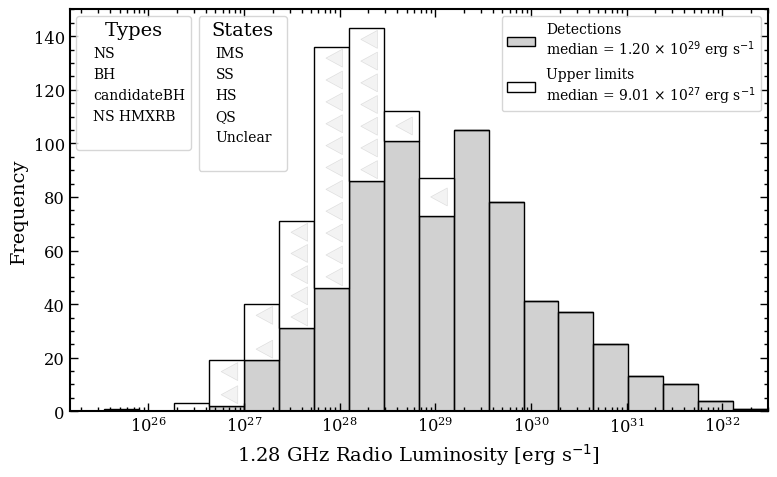

Mean Ldet:  5.675433598555924e+37
Mean Luplim:  4.382972618923719e+34
Median Ldet:  4.7424021856750963e+36
Median Luplim:  3.764960513818396e+32


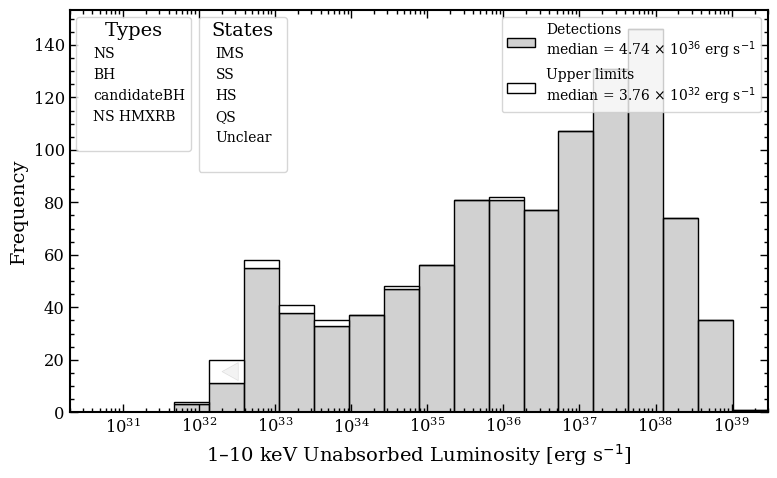

In [83]:
plot_luminosity_histogram_stacked(all_radio_df)
plot_luminosity_histogram_stacked(all_xray_df)

### Black Holes

In [71]:
radio_df_BH = all_radio_df[all_radio_df["class"].isin(["BH", "candidateBH"])]
xray_df_BH = all_xray_df[all_xray_df["class"].isin(["BH", "candidateBH"])]

Mean Ldet:  2.533972124682405e+30
Mean Luplim:  1.8717387043736077e+28
Median Ldet:  1.1545432124154818e+29
Median Luplim:  1.078411067454556e+28


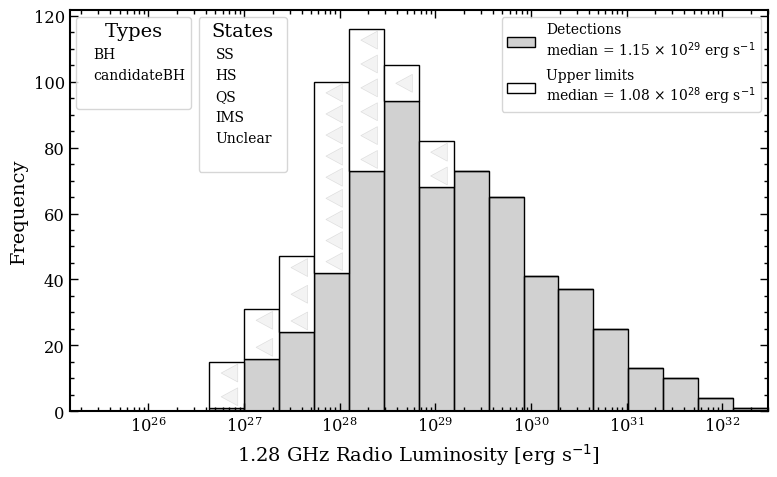

Mean Ldet:  6.129717660794689e+37
Mean Luplim:  4.382972618923719e+34
Median Ldet:  5.983726182165285e+36
Median Luplim:  3.764960513818396e+32


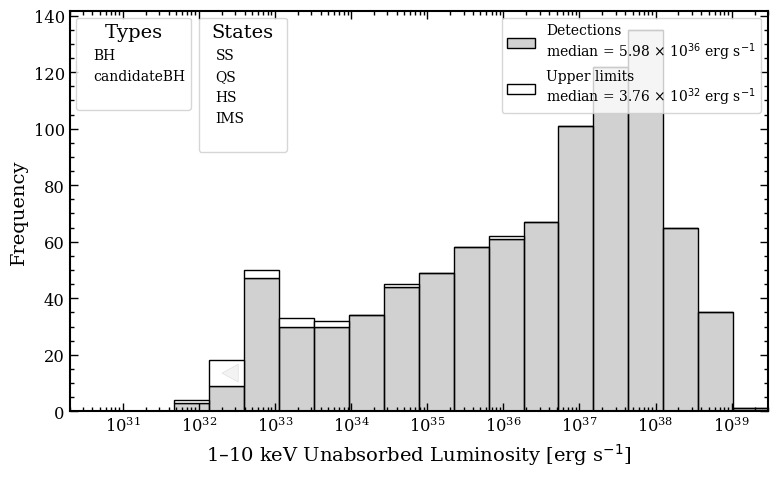

In [72]:
plot_luminosity_histogram_stacked(radio_df_BH)
plot_luminosity_histogram_stacked(xray_df_BH)

### Neutron Stars

In [73]:
radio_df_NS = all_radio_df[all_radio_df["class"].isin(["NS"])]
xray_df_NS = all_xray_df[all_xray_df["class"].isin(["NS"])]

Mean Ldet:  1.80181541913231e+29
Mean Luplim:  7.693094448857153e+27
Median Ldet:  2.016533416071276e+29
Median Luplim:  8.315093131110062e+27


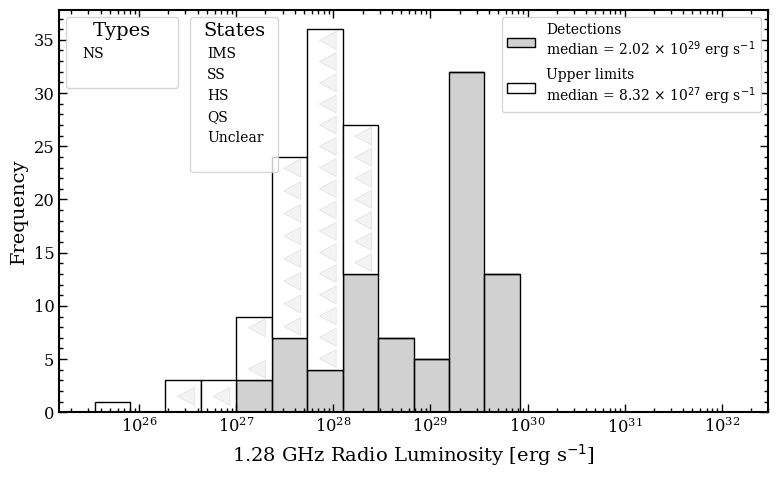

Mean Ldet:  2.3762545228135114e+37
Mean Luplim:  nan
Median Ldet:  7.671938784844304e+35
Median Luplim:  nan


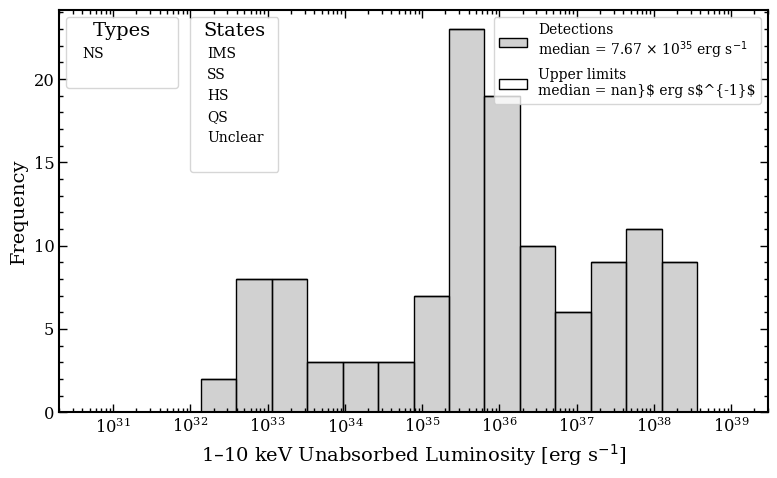

In [74]:
plot_luminosity_histogram_stacked(radio_df_NS)
plot_luminosity_histogram_stacked(xray_df_NS)

# Soft State Radio Emission
This is Figure 2 in the paper. 

### Black Holes:

In [ ]:
SS_radio_df_BH = all_radio_df[all_radio_df["Rstate"].isin(["SS"]) & (all_radio_df["class"].isin(["BH", "candidateBH"]))]

Mean Ldet:  7.956184191259791e+29
Mean Luplim:  3.2029916964652003e+28
Median Ldet:  1.058144904922704e+29
Median Luplim:  6.969037899619776e+27


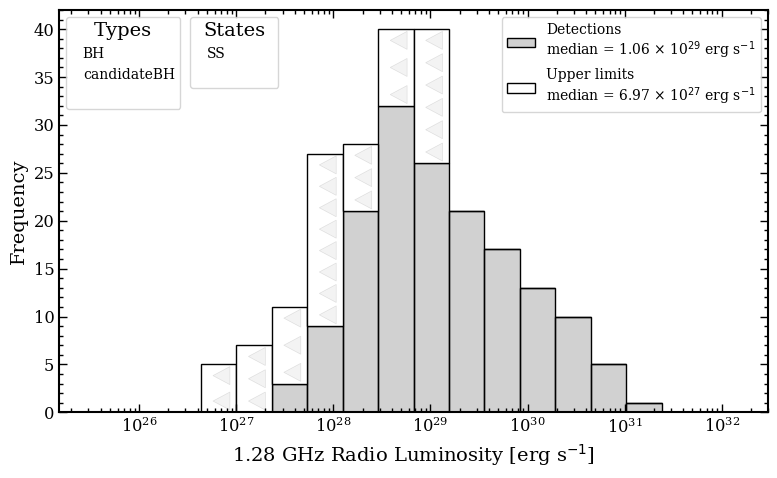

In [47]:
plot_luminosity_histogram_stacked(SS_radio_df_BH, n_bins=20, save_name="SS_radio_distribution_BH")

### Neutron Stars:

In [48]:
SS_radio_df_NS = all_radio_df[all_radio_df["Rstate"].isin(["SS"]) & (all_radio_df["class"].isin(["NS"]))]

Mean Ldet:  2.6622418869102056e+29
Mean Luplim:  1.0642827866204942e+28
Median Ldet:  2.7070568727353578e+29
Median Luplim:  9.015516523920088e+27


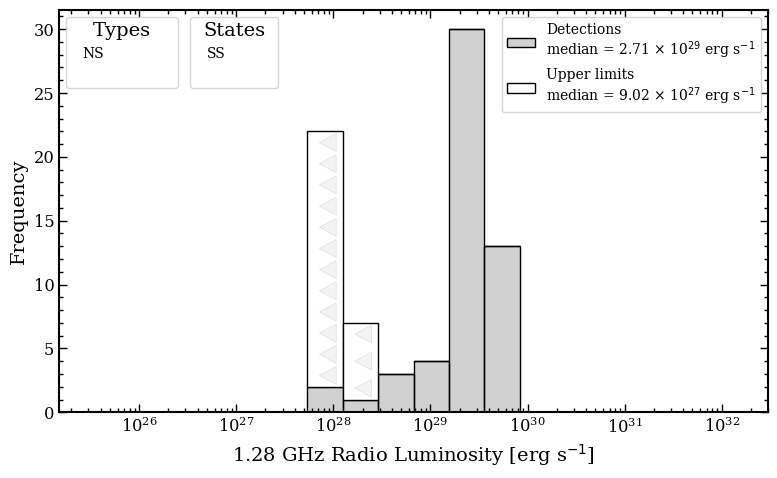

In [49]:
plot_luminosity_histogram_stacked(SS_radio_df_NS)

The peak above $10^{39}$ erg/s is due to Cir X-1 (which has daily observations). It may therefore be preferable to aveergae these so it has one observation per week, to put it on equal footing as the ther sources.

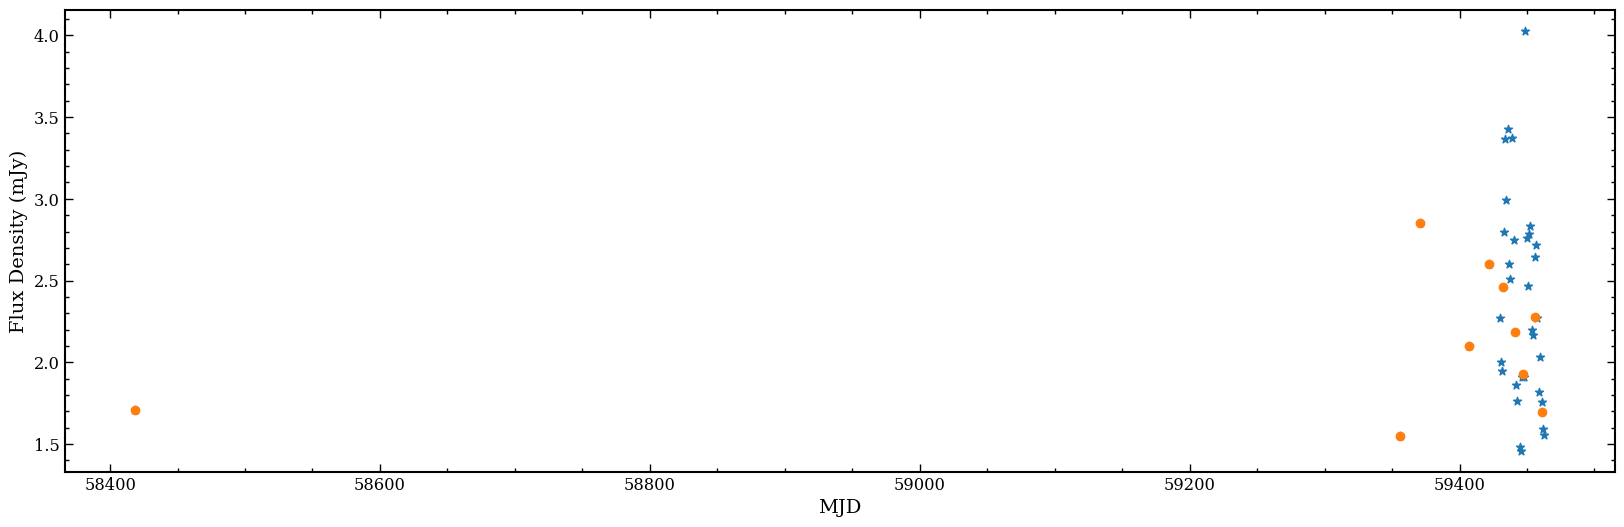

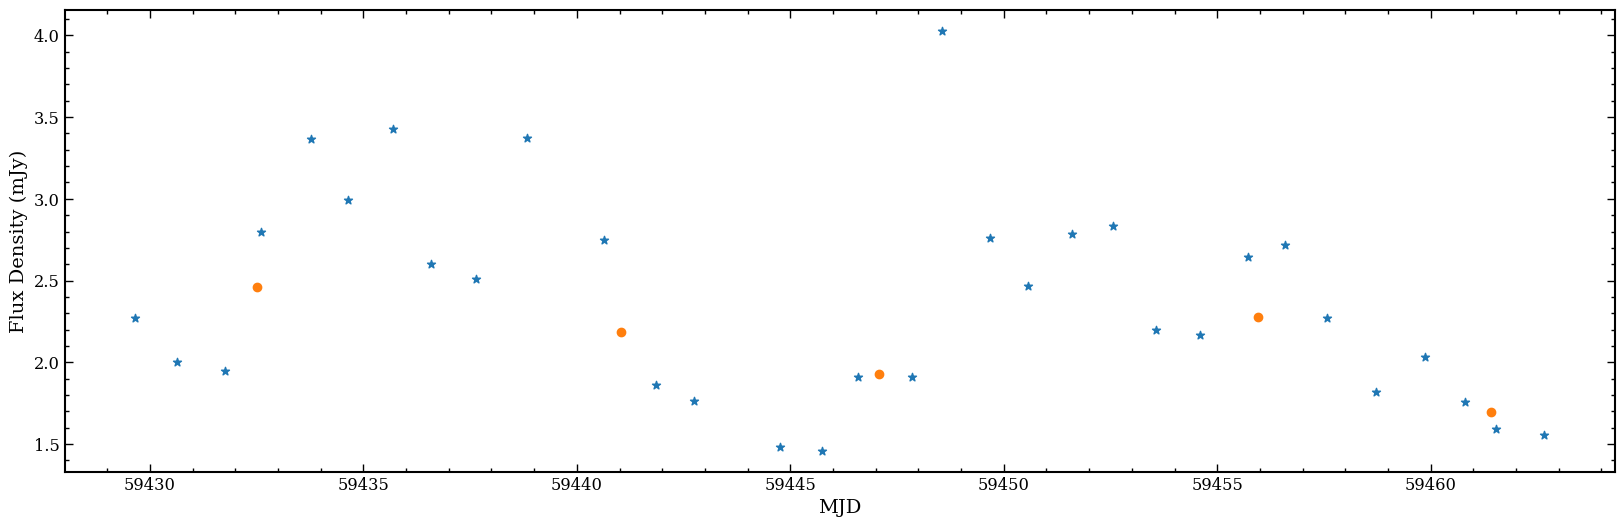

In [66]:
## Average Cir X-1 data in 7-day blocks

def weighted_mean(values, uncs):
    """Inverse-variance weighted mean and its uncertainty."""
    v = np.asarray(values, dtype=float)
    s = np.asarray(uncs, dtype=float)
    m = np.isfinite(v) & np.isfinite(s) & (s > 0)
    if m.sum() == 0:
        return np.nan, np.nan
    w = 1.0 / (s[m] ** 2)
    mean = np.sum(w * v[m]) / np.sum(w)
    unc = 1.0 / np.sqrt(np.sum(w))
    return mean, unc


## Get the data for Cir X-1
# Note that none of the observations are upper limits
cir = all_radio_df[all_radio_df["name"] == "Cir X-1"].sort_values("t_radio").reset_index(drop=True)

## Build 7-day groups anchored on the first observation of each group (in MJD)
groups = []
start_idx = 0
while start_idx < len(cir):
    t0 = cir.loc[start_idx, "t_radio"]
    in_window = (cir["t_radio"] >= t0) & (cir["t_radio"] < t0 + 7.0) # within 7 days
    idxs = cir.index[in_window]
    groups.append(idxs)
    start_idx = idxs.max() + 1

rows = []
for idxs in groups:

    g = cir.loc[idxs]
    # Only rows with finite Fr & Fr_unc contribute to weighted Fr and time
    g_wt = cir.loc[cir.index.intersection(idxs)]

    if not g_wt.empty: 
        # Weighted averages
        Fr_mean, Fr_unc = weighted_mean(g_wt["Fr"], g_wt["Fr_unc"]) 
        Lr_mean, Lr_unc = weighted_mean(g_wt["Lr"], g_wt["Lr_unc"]) 
        # Weighted-mean MJD time using the SAME weights as used for Fr (1/Fr_unc^2)
        t_mjd , _ = weighted_mean(g_wt["t_radio"], g_wt["Fr_unc"])

    # Assemble output row
    out = {
        "name": "Cir X-1",
        "band": "L",
        "blockID": "&".join(map(str, g["blockID"].astype(str).tolist())),
        "t_radio": t_mjd,   # weighted average MJD
        "dt_radio": np.nan,
        "Rphase": np.nan,
        "Rstate": "SS",
        "Fr": Fr_mean,
        "Fr_unc": Fr_unc,
        "local_rms": np.nan,
        "alpha": np.nan,
        "alpha_unc": np.nan,
        "Fr_uplim_bool": False,
        "Lr": Lr_mean if "Lr" in g.columns else np.nan,
        "Lr_unc": Lr_unc,
        "class": "NS",
    }

    # Ensure all expected columns exist; fill missing with NaN
    for col in cir.columns:
        out.setdefault(col, np.nan)

    rows.append(out)

agg_cir = pd.DataFrame(rows)[cir.columns]  # keep original column order

# Replace original Cir X-1 rows with the aggregated rows
all_radio_df_cirxAve = pd.concat([all_radio_df[all_radio_df["name"] != "Cir X-1"], agg_cir], ignore_index=True)


## Plot averaged data against original data
cir_x1_av = all_radio_df_cirxAve[all_radio_df_cirxAve["name"] == "Cir X-1"]
t_cirx1_av = cir_x1_av["t_radio"].to_numpy()
Fr_cirx1_av  = cir_x1_av["Fr"].to_numpy()

t_cirx1 = cir["t_radio"].to_numpy()
Fr_cirx1  = cir["Fr"].to_numpy()

plt.figure(figsize=(20,6))
plt.scatter(t_cirx1, Fr_cirx1, marker="*")
plt.scatter(t_cirx1_av, Fr_cirx1_av)
plt.xlabel("MJD")
plt.ylabel("Flux Density (mJy)")
plt.show()

plt.figure(figsize=(20,6))
plt.scatter(t_cirx1[5:], Fr_cirx1[5:], marker="*")
plt.scatter(t_cirx1_av[5:], Fr_cirx1_av[5:])
plt.xlabel("MJD")
plt.ylabel("Flux Density (mJy)")
plt.show()

Mean Ldet:  2.0167155780542617e+29
Mean Luplim:  1.0642827866204942e+28
Median Ldet:  2.1981619048100316e+29
Median Luplim:  9.015516523920088e+27


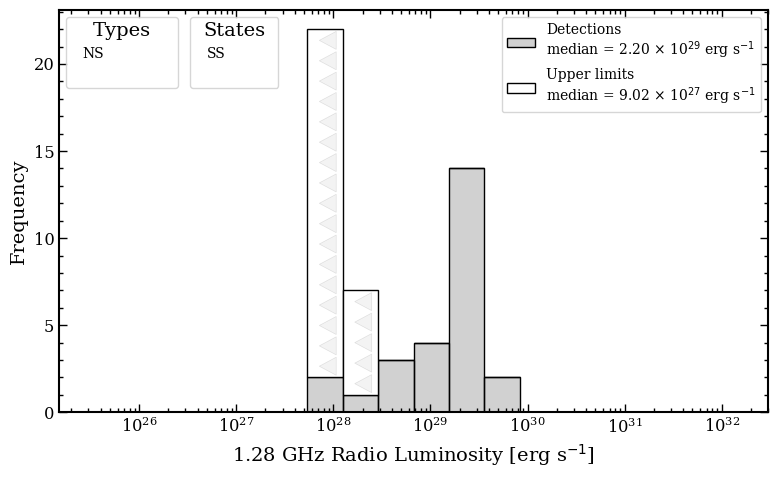

In [67]:
SS_radio_df_NS_cirxAve = all_radio_df_cirxAve[all_radio_df_cirxAve["Rstate"].isin(["SS"]) & (all_radio_df_cirxAve["class"].isin(["NS"]))]
plot_luminosity_histogram_stacked(SS_radio_df_NS_cirxAve)

# Quick Plotting Check

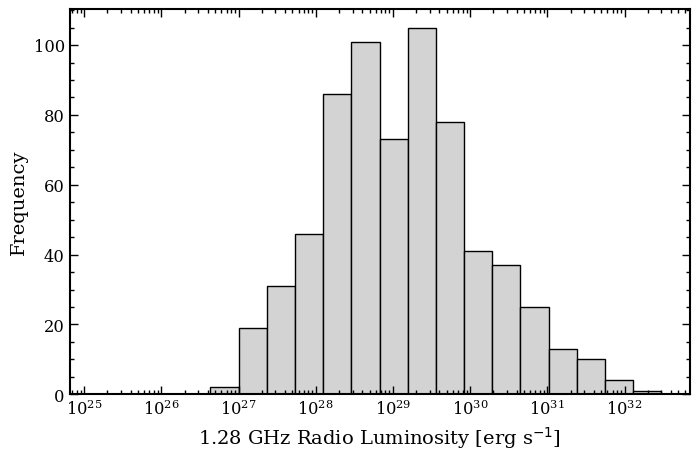

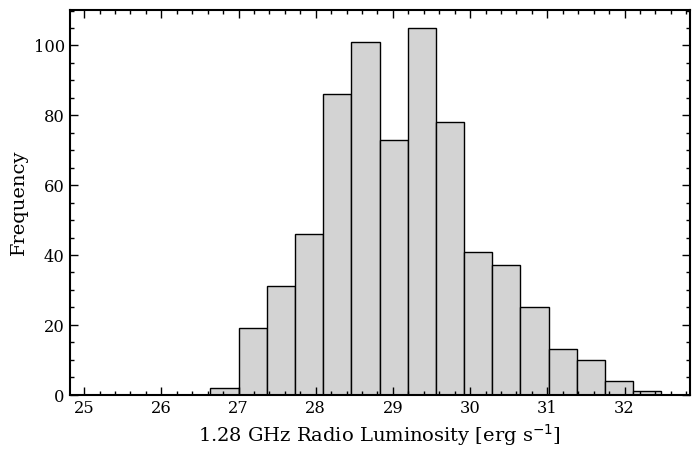

In [88]:
Lr_det_mask = ~ all_radio_df["Fr_uplim_bool"]
Lr_det = all_radio_df["Lr"].to_numpy()[Lr_det_mask]
log_Lr_det = np.log10(Lr_det)

n_bins = 20

## Create logarithmic bins
bins = np.logspace(np.log10(min_Lr), np.log10(max_Lr), n_bins + 1)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))  
counts, bins, patches = ax.hist(Lr_det, bins= bins, color='lightgrey', edgecolor='black')
ax.set_xscale('log')
plt.xlabel(r'1.28 GHz Radio Luminosity [erg s$^{-1}$]')
plt.ylabel('Frequency')
plt.show()


## Other way
log_bins = np.log10(bins)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))  
counts, bins, patches = ax.hist(log_Lr_det, bins= log_bins, color='lightgrey', edgecolor='black')
plt.xlabel(r'1.28 GHz Radio Luminosity [erg s$^{-1}$]')
plt.ylabel('Frequency')
plt.show()
